In [7]:
import numpy as np

data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [8]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

delta_w = np.zeros(M)
delta_b = 0

In [9]:
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516543

In [10]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187277

In [11]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [12]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss


total_loss()

11073.905141728206

In [13]:
plt_x = []
plt_y = []

for epoch in range(5500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    # ada_delta算法不需要设定超参数 lr
    # 需要维持两个变量,delta和S

    # S的计算和rms_prop完全一致
    S_w = 0.2 * S_w + 0.8 * gradient_w**2
    S_b = 0.2 * S_b + 0.8 * gradient_b**2

    # 1e-6 用于防止除0
    lr = (delta_w + 1e-6) / (S_w + 1e-6)
    gradient_w = lr**0.5 * gradient_w

    lr = (delta_b + 1e-6) / (S_b + 1e-6)
    gradient_b = lr**0.5 * gradient_b

    w -= gradient_w
    b -= gradient_b

    delta_w = 0.2 * delta_w + 0.8 * gradient_w**2
    delta_b = 0.2 * delta_b + 0.8 * gradient_b**2

    # 在时刻0, S就是梯度的平方乘以0.8
    # 因此在一开始的时候, S是比较大的（lr比较小）
    plt_x.append(epoch)
    plt_y.append(total_loss())

    if epoch % 500 == 0:
        print(epoch, delta_w[:2], delta_b, total_loss())

0 [9.99992961e-07 9.99998652e-07] 9.999991220323846e-07 11074.61722867378
500 [2.51140682e-06 2.16002695e-06] 2.603991290111943e-06 7673.8602231556715
1000 [9.08539238e-07 1.60932324e-06] 3.026810255108069e-06 5253.227962933604
1500 [1.73283372e-06 2.36995686e-06] 2.646633941389873e-06 3563.7232594766824
2000 [2.07689248e-07 2.73607935e-07] 3.7887565491859233e-07 2313.6932174156755
2500 [1.69738030e-06 4.88698223e-06] 3.422772111265935e-06 1595.748878825136
3000 [1.06662611e-06 3.99784020e-06] 3.811995560506087e-06 1115.3253798511298
3500 [9.44804387e-07 2.42122501e-06] 2.8053522012756664e-06 879.8368427419925
4000 [4.40475014e-07 8.72234624e-07] 1.0361238742777367e-06 790.8620501492986
4500 [1.44300498e-06 3.01051754e-07] 1.5803786798741067e-06 775.0965373933551
5000 [2.49689798e-07 3.27229123e-06] 9.487370375004783e-07 765.5782767738311


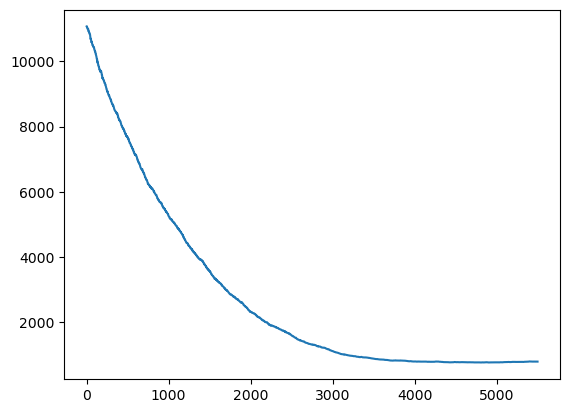

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()